In [1]:
%run 'Data Cleaning.ipynb'

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is your DataFrame

# 1. Basic info about the dataset
print(jobs_cleaned.info())

# 2. Descriptive statistics for numerical columns
print(jobs_cleaned.describe())

# 3. Count of unique values in categorical columns
categorical_cols = jobs_cleaned.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"Unique values in {col}: {jobs_cleaned[col].nunique()}")

# 4. Check for missing values in each column
print(jobs_cleaned.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 28357 entries, 0 to 75961
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      28357 non-null  int64  
 1   company_id                  28201 non-null  float64
 2   title                       28357 non-null  object 
 3   description                 28357 non-null  object 
 4   max_salary                  24443 non-null  float64
 5   med_salary                  28357 non-null  float64
 6   min_salary                  24443 non-null  float64
 7   pay_period                  28357 non-null  object 
 8   formatted_work_type         28357 non-null  object 
 9   location                    28357 non-null  object 
 10  applies                     16962 non-null  float64
 11  original_listed_time        28357 non-null  float64
 12  remote_allowed              4302 non-null   float64
 13  views                       24167 no

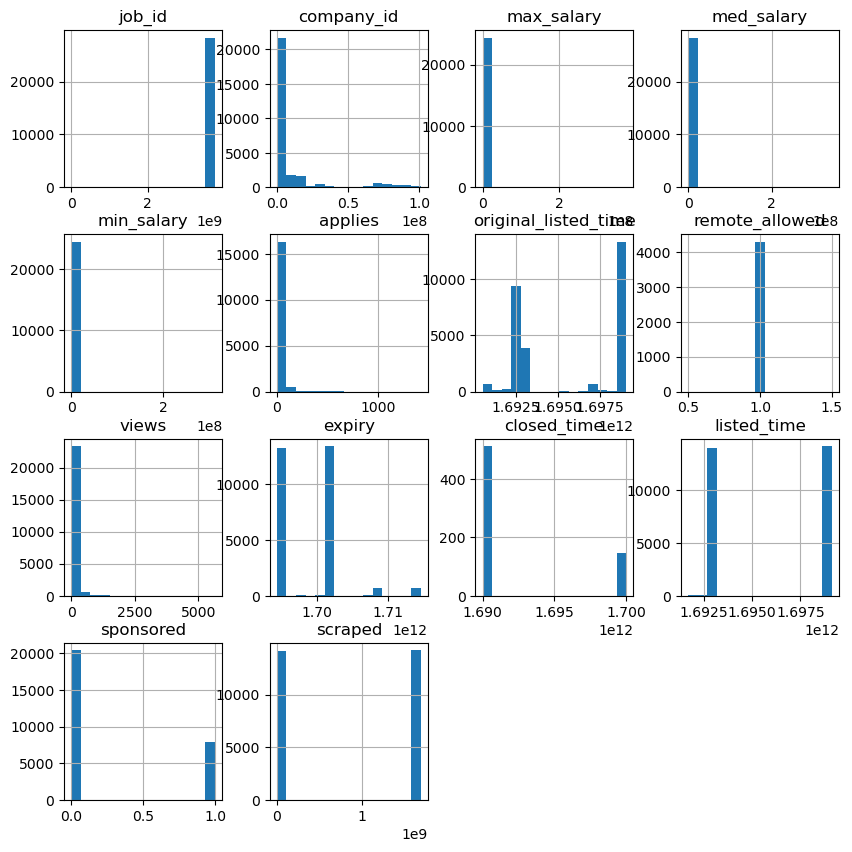

In [6]:

# 5. Basic visualization
# Histograms for numerical columns
numerical_cols = jobs_cleaned.select_dtypes(include=['float64', 'int64']).columns
jobs_cleaned[numerical_cols].hist(figsize=(10, 10), bins=15)
plt.show()

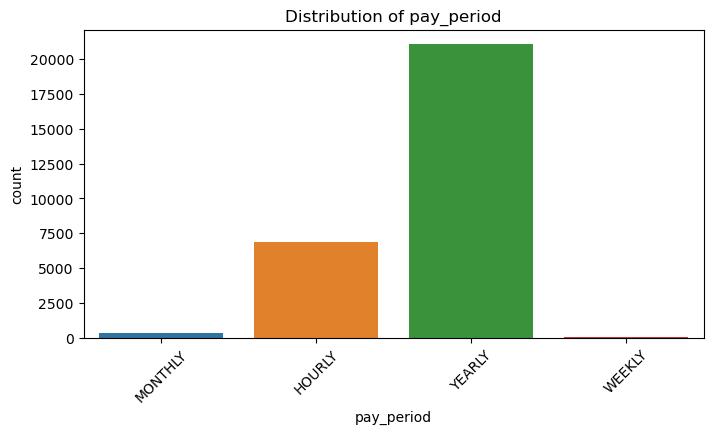

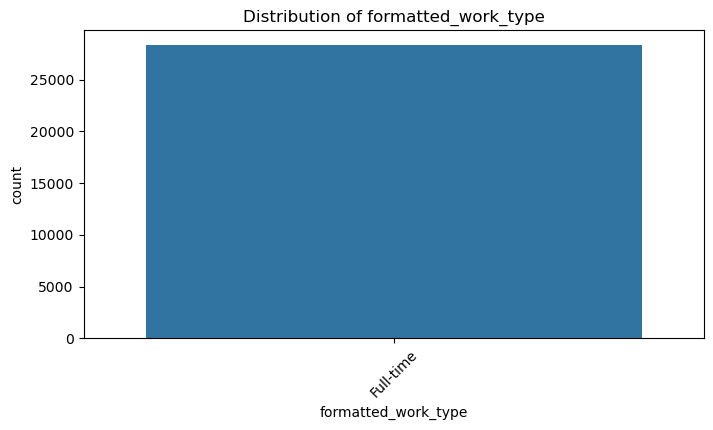

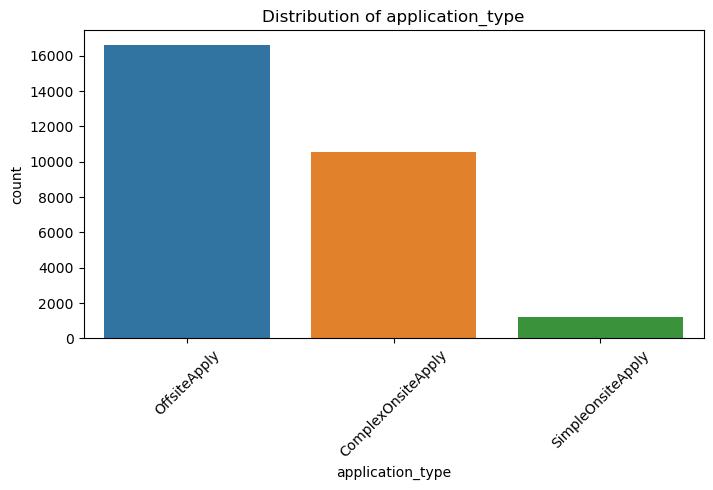

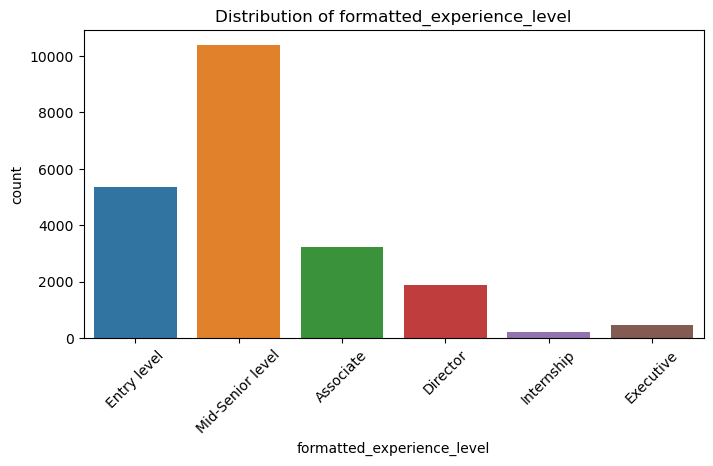

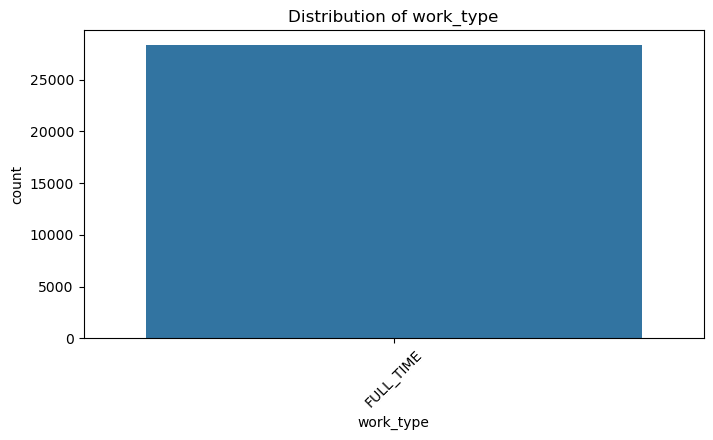

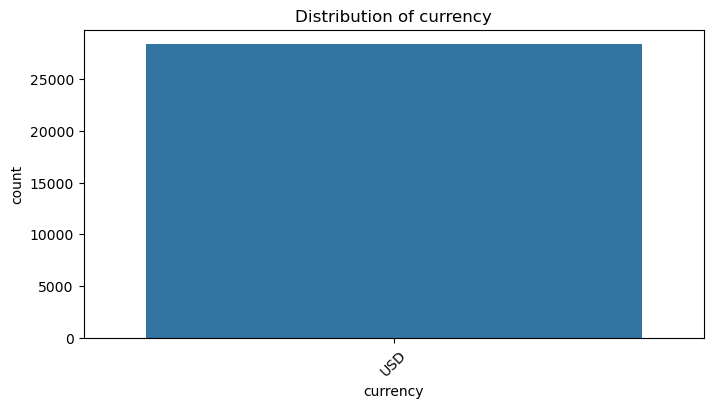

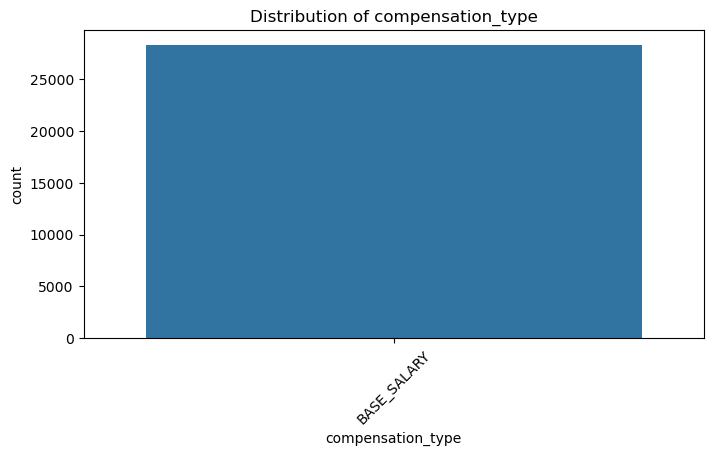

In [7]:
# Bar plots for categorical columns with less than 10 unique values
for col in categorical_cols:
    if jobs_cleaned[col].nunique() <= 10:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=jobs_cleaned, x=col)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.show()


/Users/wesleydickens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/wesleydickens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/wesleydickens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/wesleydickens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

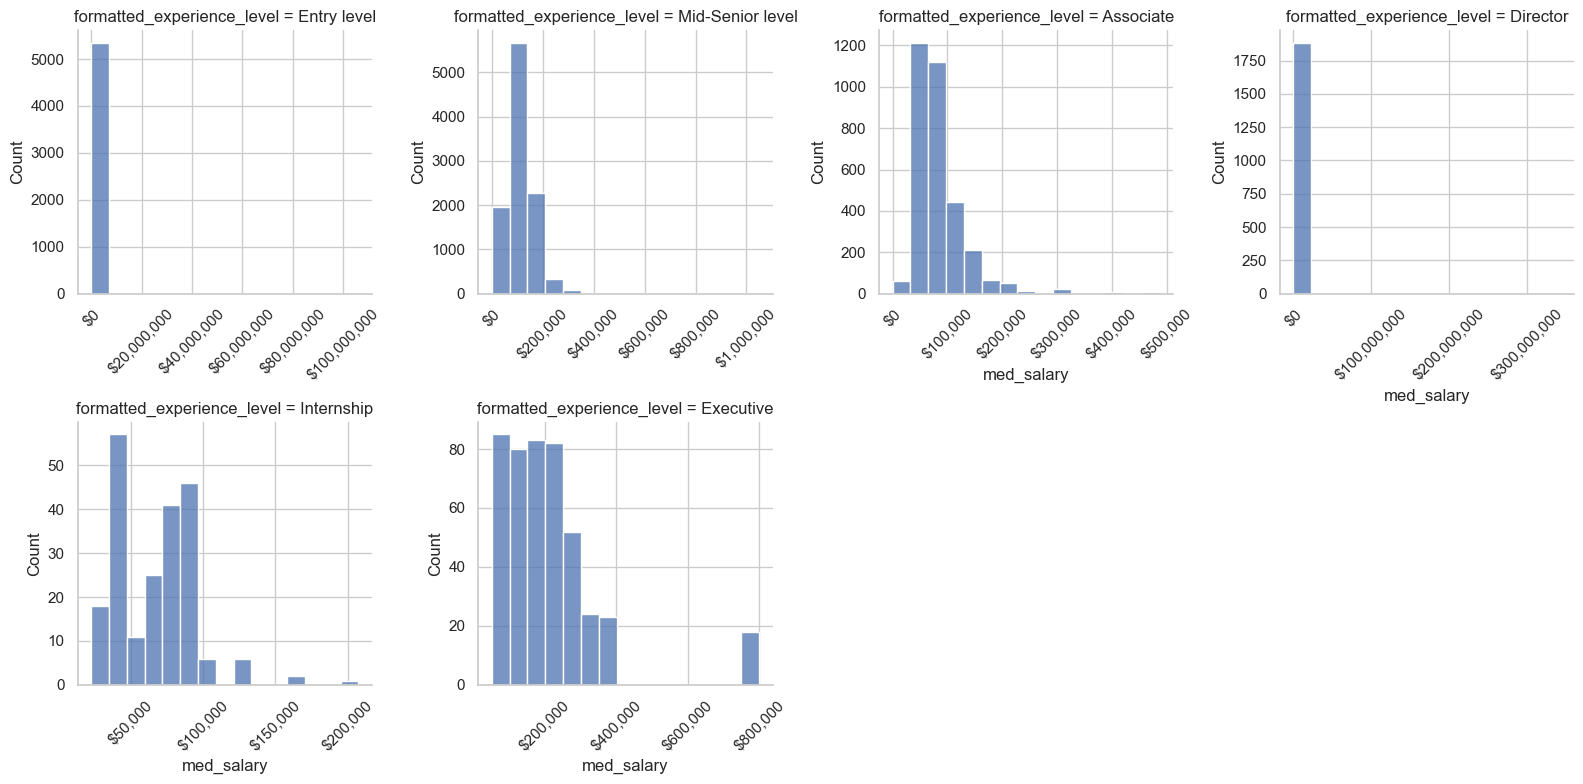

In [11]:
def dollar_formatter(x, pos):
    return f'${x:,.0f}'

sns.set(style="whitegrid")

g = sns.FacetGrid(jobs_cleaned, col='formatted_experience_level', col_wrap=4, sharex=False, sharey=False, height=4)
g.map(sns.histplot, 'med_salary', bins=15, kde=False)


for ax in g.axes:
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(dollar_formatter))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


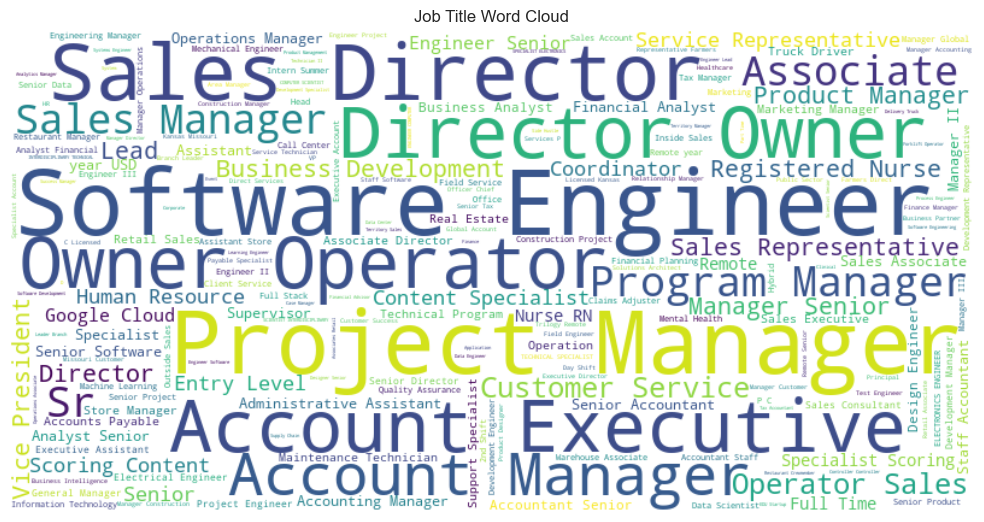

In [13]:
job_titles_text = ' '.join(jobs_cleaned['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_titles_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Job Title Word Cloud')
plt.axis('off')
plt.tight_layout()
plt.show()